In [71]:
import pandas as pd
import numpy as np
import csv

import seaborn as sns

# Microsoft Exploitability Index

In [72]:
df = pd.read_csv('../data_in/msrc/msrc_security_updates.csv')
df = df.rename(columns={"CVE Number": "cve"})
df

,Release date,Last Updated,cve,CVE Number.1,CVE Title,Publicly Disclosed,Exploitability assessment,Exploited,Impact,Max Severity,Tag
0,"Feb 9, 2023","Feb 9, 2023",CVE-2023-23374,https://msrc.microsoft.com/update-guide/vulner...,Microsoft Edge (Chromium-based) Remote Code Ex...,No,Exploitation Less Likely,No,Remote Code Execution,Moderate,Microsoft Edge (Chromium-based)
1,"Jan 12, 2023","Jan 17, 2023",CVE-2023-21796,https://msrc.microsoft.com/update-guide/vulner...,Microsoft Edge (Chromium-based) Elevation of P...,No,Exploitation Less Likely,No,Elevation of Privilege,Important,Microsoft Edge (Chromium-based)
2,"Jan 17, 2023","Jan 17, 2023",CVE-2023-21795,https://msrc.microsoft.com/update-guide/vulner...,Microsoft Edge (Chromium-based) Elevation of P...,No,Exploitation Less Likely,No,Elevation of Privilege,Important,Microsoft Edge (Chromium-based)
3,"Feb 9, 2023","Feb 9, 2023",CVE-2023-21794,https://msrc.microsoft.com/update-guide/vulner...,Microsoft Edge (Chromium-based) Spoofing Vulne...,No,Exploitation Less Likely,No,Spoofing,Low,Microsoft Edge (Chromium-based)
4,"Jan 10, 2023","Jan 11, 2023",CVE-2023-21793,https://msrc.microsoft.com/update-guide/vulner...,3D Builder Remote Code Execution Vulnerability,No,Exploitation Less Likely,No,Remote Code Execution,Important,3D Builder
...,...,...,...,...,...,...,...,...,...,...,...
187,"Nov 13, 2018","Jan 9, 2024",ADV990001,https://msrc.microsoft.com/update-guide/vulner...,Latest Servicing Stack Updates,No,NaN,No,NaN,NaN,Servicing Stack Updates
188,"Dec 13, 2022","Jan 10, 2023",ADV220005,https://msrc.microsoft.com/update-guide/vulner...,Guidance on Microsoft Signed Drivers Being Use...,No,NaN,No,Not a Vulnerability,None,Windows Certificates
189,"Dec 8, 2020","Jan 10, 2023",ADV200013,https://msrc.microsoft.com/update-guide/vulner...,Microsoft Guidance for Addressing Spoofing Vul...,No,Exploitation Less Likely,No,NaN,NaN,Microsoft Windows DNS
190,"Jul 29, 2020","Jan 10, 2023",ADV200011,https://msrc.microsoft.com/update-guide/vulner...,Microsoft Guidance for Addressing Security Fea...,No,NaN,No,NaN,NaN,Microsoft Windows


In [73]:
df = df[['cve', 'Exploitability assessment', 'Exploited', 'Impact', 'Max Severity']]
df

,cve,Exploitability assessment,Exploited,Impact,Max Severity
0,CVE-2023-23374,Exploitation Less Likely,No,Remote Code Execution,Moderate
1,CVE-2023-21796,Exploitation Less Likely,No,Elevation of Privilege,Important
2,CVE-2023-21795,Exploitation Less Likely,No,Elevation of Privilege,Important
3,CVE-2023-21794,Exploitation Less Likely,No,Spoofing,Low
4,CVE-2023-21793,Exploitation Less Likely,No,Remote Code Execution,Important
...,...,...,...,...,...
187,ADV990001,NaN,No,NaN,NaN
188,ADV220005,NaN,No,Not a Vulnerability,None
189,ADV200013,Exploitation Less Likely,No,NaN,NaN
190,ADV200011,NaN,No,NaN,NaN


In [74]:
df_enriched = pd.read_csv('../data_out/CVSSData_enriched.csv.gz', compression="gzip")
df_enriched

/var/folders/ss/mvst4cws5c9dzhhthv64hhzr0000gq/T/ipykernel_24906/2212371604.py:1: DtypeWarning: Columns (11,13,14,21,23,24,28,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df_enriched = pd.read_csv('../data_out/CVSSData_enriched.csv.gz', compression="gzip")


,cve,Published,Description,AttackVector CVSS3,AttackComplexity CVSS3,PrivilegesRequired CVSS3,UserInteraction CVSS3,Scope CVSS3,ConfidentialityImpact CVSS3,IntegrityImpact CVSS3,...,CWEs,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,BaseScore
0,CVE-1999-0095,1988-10-01,"The debug command in Sendmail is enabled, allo...",Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.01157,False,False,False,False,5,10.0
1,CVE-1999-0082,1988-11-11,CWD ~root command in ftpd allows root access.,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.11698,False,False,False,False,5,10.0
2,CVE-1999-1471,1989-01-01,Buffer overflow in passwd in BSD based operati...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00043,False,False,False,False,5,7.2
3,CVE-1999-1122,1989-07-26,Vulnerability in restore in SunOS 4.0.3 and ea...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00061,False,False,False,False,5,4.6
4,CVE-1999-1467,1989-10-26,Vulnerability in rcp on SunOS 4.0.x allows rem...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00425,False,False,False,False,5,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221756,CVE-2023-7108,False,False,False,False,False,False,False,False,False,...,False,False,False,0.00045,False,False,False,False,5,False
221757,CVE-2023-7109,False,False,False,False,False,False,False,False,False,...,False,False,False,0.00045,False,False,False,False,5,False
221758,CVE-2023-7110,False,False,False,False,False,False,False,False,False,...,False,False,False,0.00045,False,False,False,False,5,False
221759,CVE-2023-7207,False,False,False,False,False,False,False,False,False,...,False,False,False,0.00045,False,False,False,False,5,False


In [75]:
df = pd.merge(df, df_enriched,  on='cve', how='left').fillna(False)
df

,cve,Exploitability assessment,Exploited,Impact,Max Severity,Published,Description,AttackVector CVSS3,AttackComplexity CVSS3,PrivilegesRequired CVSS3,...,CWEs,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,BaseScore
0,CVE-2023-23374,Exploitation Less Likely,No,Remote Code Execution,Moderate,2023-02-14,Microsoft Edge (Chromium-based) Remote Code Ex...,NETWORK,HIGH,NONE,...,['NVD-CWE-noinfo'],False,False,0.01443,False,False,True,False,5.0,8.3
1,CVE-2023-21796,Exploitation Less Likely,No,Elevation of Privilege,Important,2023-01-24,Microsoft Edge (Chromium-based) Elevation of P...,NETWORK,HIGH,NONE,...,['NVD-CWE-noinfo'],False,False,0.00091,False,False,True,False,5.0,8.3
2,CVE-2023-21795,Exploitation Less Likely,No,Elevation of Privilege,Important,2023-01-24,Microsoft Edge (Chromium-based) Elevation of P...,NETWORK,HIGH,NONE,...,['NVD-CWE-noinfo'],False,False,0.00094,False,False,True,False,5.0,8.3
3,CVE-2023-21794,Exploitation Less Likely,No,Spoofing,Low,2023-02-14,Microsoft Edge (Chromium-based) Spoofing Vulne...,NETWORK,LOW,NONE,...,['CWE-290'],False,False,0.00082,False,False,True,False,5.0,4.3
4,CVE-2023-21793,Exploitation Less Likely,No,Remote Code Execution,Important,2023-01-10,3D Builder Remote Code Execution Vulnerability,LOCAL,LOW,NONE,...,['NVD-CWE-noinfo'],False,False,0.00234,False,False,True,False,5.0,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,ADV990001,False,No,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
188,ADV220005,False,No,Not a Vulnerability,None,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
189,ADV200013,Exploitation Less Likely,No,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
190,ADV200011,False,No,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [76]:
df['Exploitability assessment'].value_counts()

Exploitation Less Likely    133
False                        38
Exploitation More Likely     15
Exploitation Detected         4
Exploitation Unlikely         2
Name: Exploitability assessment, dtype: int64

In [77]:
# Drop rows where 'Exploitability assessment' has a value False
df_msei = df.drop(df[df['Exploitability assessment'] == False].index)

# Drop rows where cve is an advisory not a CVE
df_msei = df_msei[~df_msei['cve'].str.startswith('ADV')]
df_msei

,cve,Exploitability assessment,Exploited,Impact,Max Severity,Published,Description,AttackVector CVSS3,AttackComplexity CVSS3,PrivilegesRequired CVSS3,...,CWEs,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,BaseScore
0,CVE-2023-23374,Exploitation Less Likely,No,Remote Code Execution,Moderate,2023-02-14,Microsoft Edge (Chromium-based) Remote Code Ex...,NETWORK,HIGH,NONE,...,['NVD-CWE-noinfo'],False,False,0.01443,False,False,True,False,5.0,8.3
1,CVE-2023-21796,Exploitation Less Likely,No,Elevation of Privilege,Important,2023-01-24,Microsoft Edge (Chromium-based) Elevation of P...,NETWORK,HIGH,NONE,...,['NVD-CWE-noinfo'],False,False,0.00091,False,False,True,False,5.0,8.3
2,CVE-2023-21795,Exploitation Less Likely,No,Elevation of Privilege,Important,2023-01-24,Microsoft Edge (Chromium-based) Elevation of P...,NETWORK,HIGH,NONE,...,['NVD-CWE-noinfo'],False,False,0.00094,False,False,True,False,5.0,8.3
3,CVE-2023-21794,Exploitation Less Likely,No,Spoofing,Low,2023-02-14,Microsoft Edge (Chromium-based) Spoofing Vulne...,NETWORK,LOW,NONE,...,['CWE-290'],False,False,0.00082,False,False,True,False,5.0,4.3
4,CVE-2023-21793,Exploitation Less Likely,No,Remote Code Execution,Important,2023-01-10,3D Builder Remote Code Execution Vulnerability,LOCAL,LOW,NONE,...,['NVD-CWE-noinfo'],False,False,0.00234,False,False,True,False,5.0,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,CVE-2021-28452,Exploitation Less Likely,No,False,False,2021-04-13,Microsoft Outlook Memory Corruption Vulnerability,NETWORK,LOW,NONE,...,['CWE-787'],False,False,0.0691,False,False,True,False,5.0,7.1
183,CVE-2021-27075,Exploitation Less Likely,No,False,False,2021-03-11,Azure Virtual Machine Information Disclosure V...,ADJACENT_NETWORK,LOW,LOW,...,['NVD-CWE-noinfo'],False,False,0.00043,False,False,True,False,5.0,6.8
184,CVE-2021-26414,Exploitation Less Likely,No,Security Feature Bypass,Important,2021-06-08,Windows DCOM Server Security Feature Bypass,NETWORK,HIGH,LOW,...,['NVD-CWE-noinfo'],False,False,0.0005,False,False,True,False,5.0,4.8
185,CVE-2021-1730,Exploitation Less Likely,No,False,False,2021-02-25,<p>A spoofing vulnerability exists in Microsof...,NETWORK,LOW,NONE,...,['NVD-CWE-noinfo'],False,False,0.00131,False,False,True,False,5.0,5.4


In [78]:
df_msei['Impact'].value_counts()

Elevation of Privilege     55
Remote Code Execution      48
Information Disclosure     15
Security Feature Bypass    10
Denial of Service          10
Spoofing                    6
False                       6
Tampering                   1
Defense in Depth            1
Name: Impact, dtype: int64

In [79]:
# Convert the category column to numerical values 
# Create a mapping dictionary
category_to_number = {'Exploitation Detected': 0, 'Exploitation More Likely': 1, 'Exploitation Less Likely': 2, 'Exploitation Unlikely': 3}

# Map the 'category_column' to numerical values
df_msei['msei'] = df_msei['Exploitability assessment'].map(category_to_number)

df_msei

,cve,Exploitability assessment,Exploited,Impact,Max Severity,Published,Description,AttackVector CVSS3,AttackComplexity CVSS3,PrivilegesRequired CVSS3,...,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,BaseScore,msei
0,CVE-2023-23374,Exploitation Less Likely,No,Remote Code Execution,Moderate,2023-02-14,Microsoft Edge (Chromium-based) Remote Code Ex...,NETWORK,HIGH,NONE,...,False,False,0.01443,False,False,True,False,5.0,8.3,2
1,CVE-2023-21796,Exploitation Less Likely,No,Elevation of Privilege,Important,2023-01-24,Microsoft Edge (Chromium-based) Elevation of P...,NETWORK,HIGH,NONE,...,False,False,0.00091,False,False,True,False,5.0,8.3,2
2,CVE-2023-21795,Exploitation Less Likely,No,Elevation of Privilege,Important,2023-01-24,Microsoft Edge (Chromium-based) Elevation of P...,NETWORK,HIGH,NONE,...,False,False,0.00094,False,False,True,False,5.0,8.3,2
3,CVE-2023-21794,Exploitation Less Likely,No,Spoofing,Low,2023-02-14,Microsoft Edge (Chromium-based) Spoofing Vulne...,NETWORK,LOW,NONE,...,False,False,0.00082,False,False,True,False,5.0,4.3,2
4,CVE-2023-21793,Exploitation Less Likely,No,Remote Code Execution,Important,2023-01-10,3D Builder Remote Code Execution Vulnerability,LOCAL,LOW,NONE,...,False,False,0.00234,False,False,True,False,5.0,7.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,CVE-2021-28452,Exploitation Less Likely,No,False,False,2021-04-13,Microsoft Outlook Memory Corruption Vulnerability,NETWORK,LOW,NONE,...,False,False,0.0691,False,False,True,False,5.0,7.1,2
183,CVE-2021-27075,Exploitation Less Likely,No,False,False,2021-03-11,Azure Virtual Machine Information Disclosure V...,ADJACENT_NETWORK,LOW,LOW,...,False,False,0.00043,False,False,True,False,5.0,6.8,2
184,CVE-2021-26414,Exploitation Less Likely,No,Security Feature Bypass,Important,2021-06-08,Windows DCOM Server Security Feature Bypass,NETWORK,HIGH,LOW,...,False,False,0.0005,False,False,True,False,5.0,4.8,2
185,CVE-2021-1730,Exploitation Less Likely,No,False,False,2021-02-25,<p>A spoofing vulnerability exists in Microsof...,NETWORK,LOW,NONE,...,False,False,0.00131,False,False,True,False,5.0,5.4,2


In [80]:
df_msei[df_msei['Exploitability assessment'] == 'Exploitation Detected']



,cve,Exploitability assessment,Exploited,Impact,Max Severity,Published,Description,AttackVector CVSS3,AttackComplexity CVSS3,PrivilegesRequired CVSS3,...,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,BaseScore,msei
76,CVE-2023-21674,Exploitation Detected,Yes,Elevation of Privilege,Important,2023-01-10,Windows Advanced Local Procedure Call (ALPC) E...,LOCAL,LOW,LOW,...,False,False,0.00099,False,True,True,True,0.0,8.8,0
171,CVE-2021-43890,Exploitation Detected,Yes,Spoofing,Important,2021-12-15,<p>We have investigated reports of a spoofing ...,NETWORK,HIGH,LOW,...,False,False,0.00167,False,True,True,False,0.0,7.1,0
174,CVE-2021-34527,Exploitation Detected,Yes,Remote Code Execution,Critical,2021-07-02,<p>A remote code execution vulnerability exist...,NETWORK,LOW,LOW,...,True,False,0.96818,False,True,True,False,0.0,8.8,0
186,CVE-2013-3900,Exploitation Detected,Yes,False,False,2013-12-11,The WinVerifyTrust function in Microsoft Windo...,Missing_Data,Missing_Data,Missing_Data,...,False,False,0.4141,False,True,True,False,0.0,7.6,0


In [81]:
df_msei['msei'].value_counts()

2    131
1     15
0      4
3      2
Name: msei, dtype: int64

In [82]:
df_msei['exploit'].value_counts()


5.0    144
0.0      7
2.0      1
Name: exploit, dtype: int64

In [83]:
df_msei['epss']=df_msei['epss'].astype(float)


In [84]:
df_msei.to_csv('../data_out/msrc/msrc.csv.gz', index=False, quoting=csv.QUOTE_NONNUMERIC, escapechar='\\', compression='gzip')


/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


Text(0.5, 0.98, 'Microsoft Exploitability Index vs EPSS')

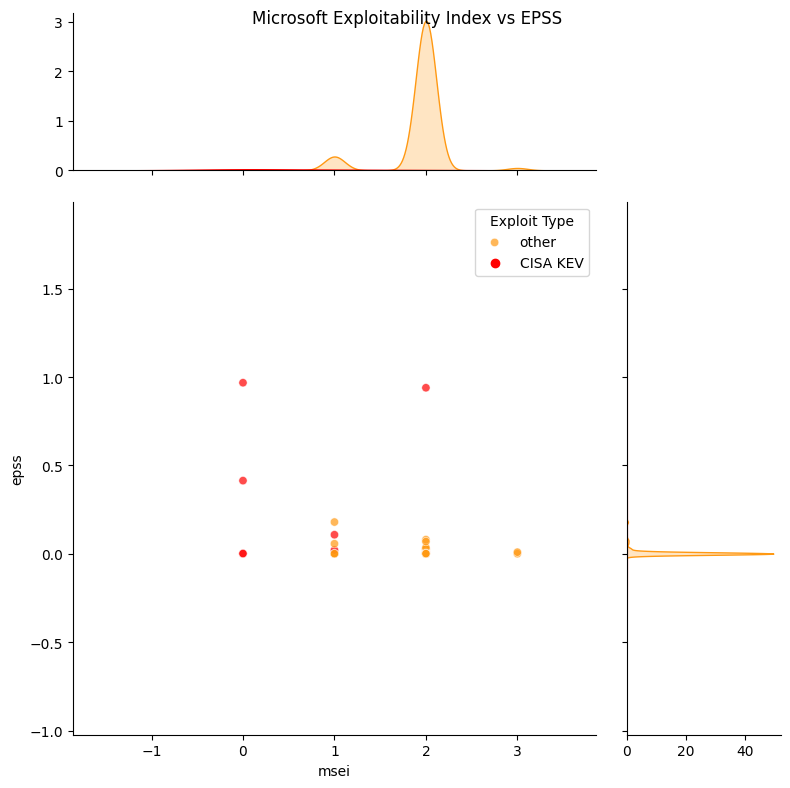

In [85]:
palette1 = ["#ff0000", "#C750BD", "#FF9913", "#FFE900", "#398e14", "#0000FF"]
#g=sns.jointplot(data=df_msei, x='msei', y='epss', hue="exploit", palette=palette1)

g=sns.jointplot(data=df_msei, x='msei', y='epss', kind='scatter', height=8, ratio=3, marginal_ticks=True, alpha=.7, hue="exploit", palette=palette1)
g.ax_joint.legend( labels = ['other','CISA KEV'], title="Exploit Type")

g.fig.suptitle("Microsoft Exploitability Index vs EPSS")